In [1]:
# O que são outliers: Dados que fogem do padrão e da normalidade

# Vamos começar fazendo a instalação do pyod que é uma biblioteca especifica
# para lidar com outliers

# Vamos usar a biblioteca pyod para gerar dados sinteticos

# Import dos frameworks

# O pandas tem como objetivo acessar, analisar e manipular
# dados de um dataset
import pandas as pd

# Biblioteca para computação numérica eficiente e manipulação de arrays
import numpy as np

# Serve para criar e manipular gráficos
import matplotlib.pyplot as plt

# O seaborn possui uma grande variedade de gráficos
import seaborn as sns

#  PyOD: Importação do método generate_data para criar dados sintéticos

from pyod.utils.data import generate_data


In [2]:
# gerar dados sintéticos para outliers

# Dados Sintéticos: São dados gerados artificialmente por algoritmos ou simulações, em vez de serem encontrados diretamente no mundo real.
# Esses dados imitam as caracteristicas estatisticas e estruturais dos
# dados reais e são amplamentes utilizados no dia-a-dia.

# generate_data: função usada para criar dados sintéticos.

# n_train: Este argumento indica que o numero de amostras de treinamento
# será 1000

# train_only: irá gerar apenas dados de treinamento

# n_features: Este argumento indica que cada amostra gerada terá 2 caracteristicas.

# Dados_x: irá receber Valores das caracteristicas

# Dados_y = irá receber os valores-alvos (etiqueta)

Dados_x,Dados_y = generate_data(n_train=1000, train_only=True, n_features=2)

# Coleta dos valores dos eixos

# Dados_x: Representa um conjunto de dados, um array, onde cada linha 
# corresponde a uma observação e cada coluna a uma caracteristica (feature)
# [:, 0]: Está representando o indice do array Dados_x
# : = Significa que estamos pegando todas as linhas.
# Dados_x[:,[0]]: Está extraindo a primeira coluna do array Dados_x e
# criando  um novo array com apenas essa coluna.
# Reshape(-1,1): É usada para dar um novo formato ao array. -1 significa 
# que o NumPy deve calcular automaticamente o numero de linhas necessário 
# para manter o mesmo número total de elementos. 1 significa que queremos
# o array resultante tenha uma coluna. Isso é util para garantir que o array
# tenha a forma correta para ser usado como um eixo em um gráfico ou como uma
# feature em um modelo de machine learning
Eixo_x = Dados_x[:, [0]].reshape(-1,1)

Eixo_y = Dados_x[:,[1]].reshape(-1,1)



In [4]:
# Criando uma tabela

# Primeiro, vamos criar um dataframe usando os dados da variável Eixo_X, onde
# criaremos uma coluna que irá conter esses valores
Tabela = pd.DataFrame(Eixo_x, columns=['Eixo x'])

# Criando uma coluna que ira conter os valores do EIXO_Y no dataframe 
Tabela['Eixo y'] = Eixo_y

# Criando uma coluna que ira conter os valores do Dados-x no dataframe
Tabela['Classe'] = Dados_y

# As 10 primeiras linhas do dataframe
Tabela.head(10)

,Eixo x,Eixo y,Classe
0,0.019421,0.084742,0.0
1,-0.023827,-0.031120,0.0
2,-0.033255,0.024026,0.0
3,0.068053,-0.099805,0.0
4,-0.055892,-0.009387,0.0
5,-0.081185,-0.087703,0.0
6,-0.112891,-0.025195,0.0
7,0.006770,-0.067734,0.0
8,-0.042157,-0.050844,0.0
9,-0.037526,-0.061545,0.0


In [5]:
# Contando os valores únicos  da coluna classe, dessa amenira
# vamos conseguir observar a quantidade de valores que são outliers(valores
# iguais a 1) e a quantidade de valores não outliers(valores iguais a 0).
# value_counts: Conta a frequência de cada valor único na coluna selecionada.
Tabela['Classe'].value_counts()

Classe
0.0    900
1.0    100
Name: count, dtype: int64

In [6]:
# Agora vamos verificar a porcentagem da frequencia desses valores usando
# o normalize da função value_counts.

Tabela['Classe'].value_counts(normalize=True) * 100

# Temos 90% de valores comuns e 10% de valores outliers

Classe
0.0    90.0
1.0    10.0
Name: proportion, dtype: float64

<Axes: title={'left': 'Analisando os valores da biblioteca'}, xlabel='Eixo x', ylabel='Eixo y'>

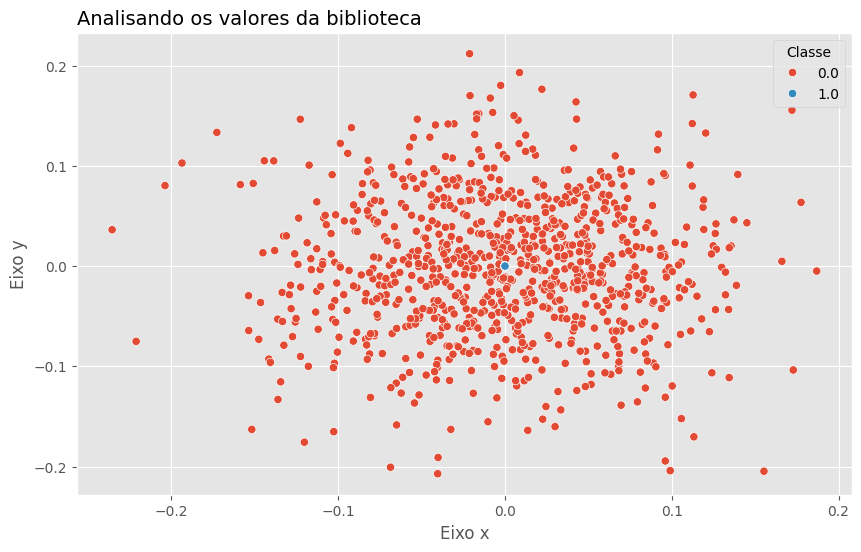

In [7]:

# plot do gráfico

# estilo de grafico do matplotlib

plt.style.use('ggplot')

# Tamanho do gráfico

plt.figure(figsize=(10, 6))

# titulo alinhado a esquerda com fonte do tamanho 14

plt.title("Analisando os valores da biblioteca", loc='left', fontsize=14)

# Função que irá criar um grafico scatterplot
# Scatterplot: Gráfico que visa mostrar a distribuição e os padrões dos dados.
# O scatterplort serve para:
# mostrar a relação entre 2 variáveis numéricas, identificar padrões, 
# detectar outliers e visualizar agrupamentos.

# O hue serve para colorir grupos de dados presentes no dataframe com
# o objetivo de facilitar a visualização dos dados no gráfico
# Data: base de dados analisada
# x: Valores do eixo x
# y: valores do eixo y
sns.scatterplot(data=Tabela, x = 'Eixo x', y = 'Eixo y', hue='Classe')

In [8]:
# Análise descritiva do dataframe

# O transpose ira inverter as colunas e as linhas da tabela descritiva
Tabela.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Eixo x,1000.0,-0.000498,0.062547,-0.23557,-0.037512,0.0,0.041636,0.186879
Eixo y,1000.0,-0.001645,0.064040,-0.20718,-0.040168,0.0,0.036493,0.211813
Classe,1000.0,0.100000,0.300150,0.00000,0.000000,0.0,0.000000,1.000000


C:\Users\caike\AppData\Local\Temp\ipykernel_23580\2777075087.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=Tabela, y='Eixo y', width=0.35, palette='husl')
C:\Users\caike\AppData\Local\Temp\ipykernel_23580\2777075087.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=Tabela, y='Eixo x', width=0.35, palette='husl')


<Axes: title={'left': 'Analisando a coluna "Eixo x"'}, ylabel='Eixo x'>

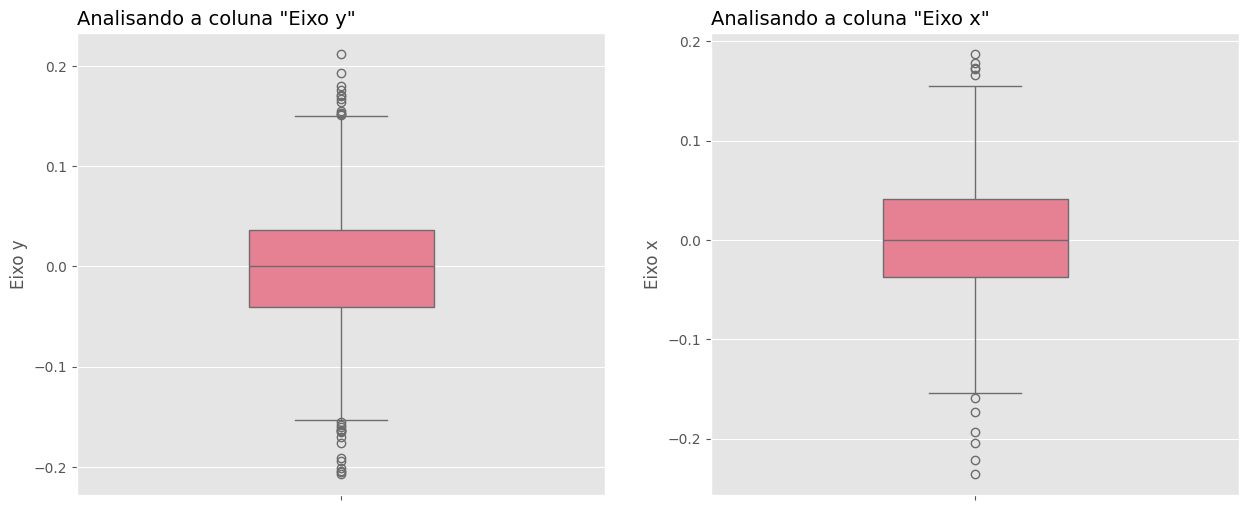

In [9]:
# Para visualizar melhor essas informações, vamos criar um grid de gráficos

# Tamanho da imagem que ira conter os gráficos.
plt.figure(figsize=(15,6))


# Criação do gráfico 1
# Tera uma 1 linha
# terá 2 colunas  
# seleciona o primeiro subplot (o da esquerda), ou seja, defini
# o 1° espaço como o espaço do gráfico 1.
plt.subplot(1, 2, 1)

# No primeiro plot vamos criar um boxplot para
# análisar a coluna do 'Eixo_y'

# Titulo do gráfico 1 alinhado a esquerda e com tamanho 14
plt.title('Analisando a coluna "Eixo y"', loc='left', fontsize=14)

# Criação do boxplot do gráfico 1: vamos usar o boxplot da função seaborn
# que ira receber como argumento a base de dados analisada, o valor do eixo
# y, a largura da caixa e a paleta de cores escolhida.
sns.boxplot(data=Tabela, y='Eixo y', width=0.35, palette='husl')

# Criação do gráfico 2
# Tera 1 linha
# terá 2 colunas
# Seleciona o segundo subplot (o da direita), ou seja, defini o 2° 
# espaço como espaço do gráfico 2.
plt.subplot(1, 2, 2)

#Titulo do grafico 2 alinhado a esquerda e com tamanho da fonte 14
plt.title('Analisando a coluna "Eixo x"', loc='left', fontsize=14)

# Criação do boxplot do gráfico 2: vamos usar o boxplot da função seaborn
# que ira receber como argumento a base de dados analisada, o valor do eixo
# y, a largura da caixa e a paleta de cores escolhida.
sns.boxplot(data=Tabela, y='Eixo x', width=0.35, palette='husl')




In [13]:
# Cálculos para extrair os outliers

# primeiro Vamos calcular o 1° quartil dos nossos dados (Valores abaixo 
# dos 25% dos dados).

# np: biblioteca NumPy, que é fundamental para realizar operações numéricas
# em python, especialmente em arrays e matrizes

# percentile: Essa função do NumPy calcula o percentil de um conjunto de dados

# Tablea['Eixo x']: Coluna que ira possuir os valores numéricos que serão
# análisados.

# 25: Representa o valor do percentil, ou seja o 25° valor abaixo dos 25%
# dos dados se encontram

# Interpolation = 'midpoint':Essa opção define o método de interpolação
# utilizado para calcular o percentil. 'midpoint' é um método comum que
# calcula o percentil como o ponto médio entre os valores mais próximos 

# Q1: O resulatdo do percentil é armazenado na variável Q1.


Q1 = np.percentile(Tabela['Eixo x'], 25, interpolation='midpoint')

# Calculo do terceiro quartil (valores abaixo de 75% dos dados)

Q3 = np.percentile(Tabela['Eixo x'], 75, interpolation='midpoint')

# Cálculo do IQR (intervalo do quartil), que basicamente é a diferença
# entre o terceiro e o primeiro quartil. Vamos usar esse valor para
# calcular a remoção dos outliers
IQR = Q3-Q1

print("Primeiro Quartil: ", Q1)

print("Terceiro Quartil: ", Q3)

print('Intervalo do quartil(IQR): ', IQR)

Primeiro Quartil:  -0.037516617397086074
Terceiro Quartil:  0.041639320312078974
Intervalo do quartil(IQR):  0.07915593770916504


In [ ]:
# Agora vamos verificar quais valores devem ser excluidos, Basicamente vamos usar os intervalo de quartil para calcular uma extremidade superior (até o percentil de 75%) e uma extremidade inferior (até o percentil de 25%).
# Ou seja, todo numero que estiver acima da extremidade superior ou abaixo
# da extremidade inferior será considerado um outlier e será excluido

# 1.5: O valor 1.5 oferece um bom equilibrio entre sensibilidade e especificidade. Um valor menor poderia classificar muitos pontos como
# outliers, enquanto um valor maior poderia deixar passar alguns pontos
# outliers verdadeiros.

# Extremidade superior
extremidade_superior = Q3 + 1.5 * IQR 

# Extremidade inferior

extremidade_inferior = Q1 - 1.5 * IQR

print("Extremidade superior: ", extremidade_superior)

print("Extremidade inferior: ", extremidade_inferior)

Extremidade superior:  0.16037322687582653
Extremidade inferior:  -0.15625052396083364


In [16]:
# Agora que ja descobrimos os valor da extremidade superior e inferior, vamos 
# localizar os outliers

# Ira filtrar os valores iguais ou acima do terceiro quartil(percentil de 75%),
# que é a extremidade superior
superior = Tabela['Eixo x'] >= extremidade_superior

# Ira filtrar os valores iguais ou abaixo do primeiro quartil (percentil de 25%), que é a extremidade inferior
inferior = Tabela['Eixo x'] <= extremidade_inferior

# Agora que já realizamos o filtro, vamos localizar as posições que os 
# outliers estão ocupando na base de dados, usando o método where
# da biblioteca NumPy.

# np.where: é uma ferramenta que permite encontrar os indices de um elemento em um array numpy que satisfazem determinadas condições. Basicamente, ele diz
# a posição (indice) que um determinado valor ocupa baseado eem um critério.
 

# Impressão dos resultados.
print("Outliers acima da extremidade superior: ", np.where(superior))

print("Outliers abaixo da linha inferior: ", np.where(inferior))


Outliers acima da extremidade superior:  (array([116, 428, 541, 629, 720]),)
Outliers abaixo da linha inferior:  (array([166, 239, 296, 401, 622, 651]),)


In [ ]:
# Agora, vamos iniciar o processo de exclusão dos outliers

# Ira receber a posição dos valores considerados superiores (maior que o 
# percentil de 75%)
dados_superiores = np.where(superior)

# Irá receber a posição dos valores inferiores (menores que o percentil de 25%s)
dados_inferiores = np.where(inferior)

# Agora vamos imprimir a quantidade de outliers encontrados

# shape: retorna uma tupla: O método shape retorna uma tupla que representa a forma do array. Para obter o número de elementos (ou seja, a quantidade de outliers), você precisa acessar o primeiro elemento dessa tupla.

print("Serão excluidos ", dados_superiores[0].shape, " registros por que são maiores que o terceiro quartil")

print("Serão excluidos ", dados_inferiores[0].shape, " por que são menores que o primeiro quartil")

# Agora vamos excluir os valores que ultrapassam a extremidade superior
# e os valores que estão abaixo da extremidade inferior.
nova_base_dados = Tabela.drop(dados_superiores[0])

nova_base_dados = Tabela.drop(dados_inferiores[0])




Serão excluidos  (5,)  registros por que são maiores que o terceiro quartil
Serão excluidos  (6,)  por que são menores que o primeiro quartil


In [30]:
print('Antes havia ', Tabela.shape[0], ' registros')

print('Agora temos ', nova_base_dados.shape[0], ' registros') 

print(f'Foram retirados {Tabela.shape[0] - nova_base_dados.shape[0]} Valores')

Antes havia  1000  registros
Agora temos  994  registros
Foram retirados 6 Valores


C:\Users\caike\AppData\Local\Temp\ipykernel_23580\4189592475.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=nova_base_dados, y='Eixo y', palette='husl', width=0.35)
C:\Users\caike\AppData\Local\Temp\ipykernel_23580\4189592475.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=Tabela, y='Eixo y', width=0.35, palette='husl')


<Axes: title={'center': 'Analisando a coluna do "Eixo y" com os outliers'}, ylabel='Eixo y'>

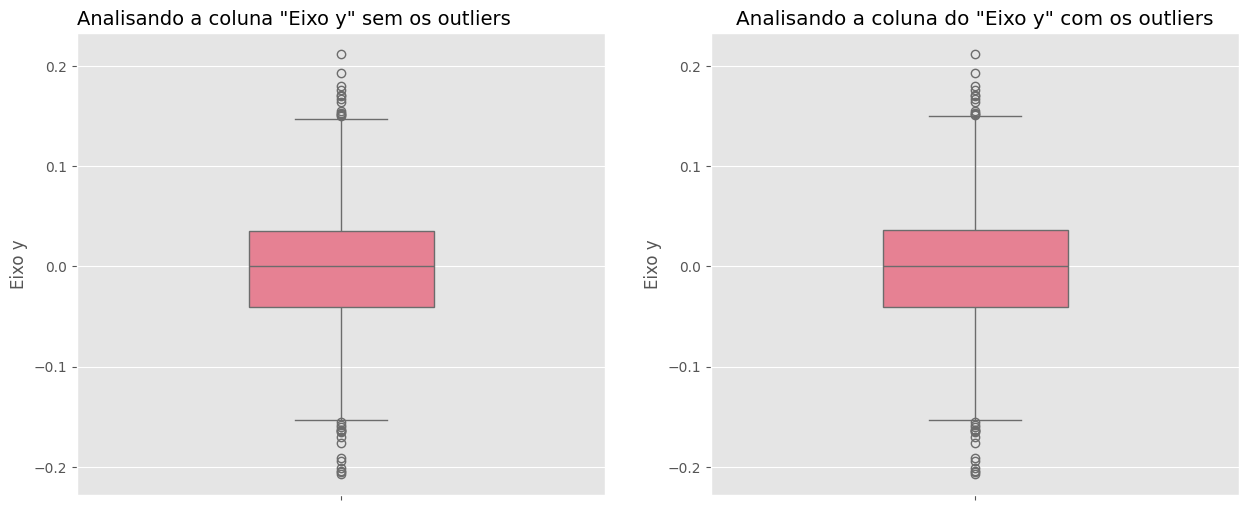

In [34]:
# Agora vamos novamente montar o grid de boxplots para visualizar a nova base 
# de dados sem os outliers 

# Tamanho da imagem que ira conter os grid de gráficos
plt.figure(figsize=(15,6))

# Gráfico 1: O primeiro subplot(gráfico 1) irá conter 1 linha, 2 colunas
# e ocupará o espaço 1
plt.subplot(1, 2, 1)

# Titulo do gráfico 1 alinhado a esquerda com tamanho 
plt.title('Analisando a coluna "Eixo y" sem os outliers', loc='left', fontsize=14)

# Criação do método que irá cria o gráfioc boxplot. A função irá receber
# como parametro a base de dados análisada, o valor do eixo y (coluna do
# eixo y), a paleta de cores utilizada e a largura da caixa do boxplot.
sns.boxplot(data=nova_base_dados, y='Eixo y', palette='husl', width=0.35)

# Gráfico 1: O segundo subplot(gráfico 2) irá conter 1 linha, 2 colunas
# e ocupará o espaço 2
plt.subplot(1, 2, 2)

plt.title('Analisando a coluna do "Eixo y" com os outliers')

sns.boxplot(data=Tabela, y='Eixo y', width=0.35, palette='husl')

